In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('train.csv')
data.head(3)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


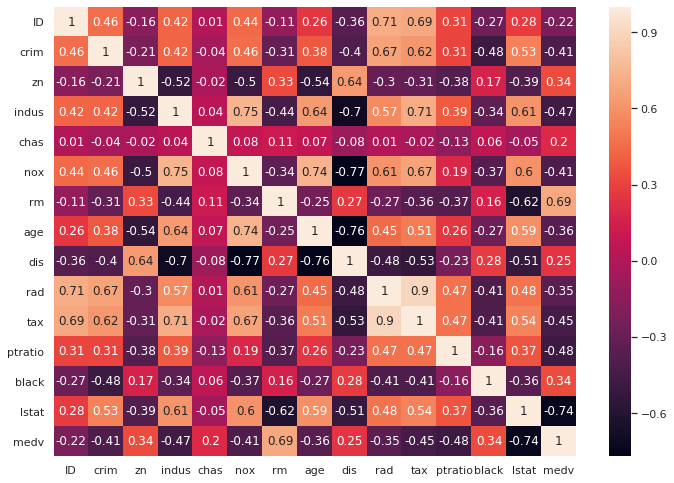

In [6]:
correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [11]:
X=pd.DataFrame(np.c_[data['rm'],data['lstat']],columns=['rm','lstat'])
X=np.array(X)
Y=np.array(data.iloc[:,-1])

In [13]:
X,Y

(array([[ 6.575,  4.98 ],
        [ 6.421,  9.14 ],
        [ 6.998,  2.94 ],
        [ 7.147,  5.33 ],
        [ 6.012, 12.43 ],
        [ 6.377, 20.45 ],
        [ 6.009, 13.27 ],
        [ 5.889, 15.71 ],
        [ 5.949,  8.26 ],
        [ 6.096, 10.26 ],
        [ 5.834,  8.47 ],
        [ 5.935,  6.58 ],
        [ 5.456, 11.69 ],
        [ 5.57 , 21.02 ],
        [ 5.965, 13.83 ],
        [ 6.142, 18.72 ],
        [ 5.813, 19.88 ],
        [ 6.047, 17.28 ],
        [ 5.713, 22.6  ],
        [ 6.072, 13.04 ],
        [ 6.096, 20.34 ],
        [ 5.966, 10.13 ],
        [ 6.595,  4.32 ],
        [ 7.024,  1.98 ],
        [ 6.169,  5.81 ],
        [ 6.211,  7.44 ],
        [ 6.069,  9.55 ],
        [ 5.682, 10.21 ],
        [ 5.786, 14.15 ],
        [ 6.03 , 18.8  ],
        [ 5.602, 16.2  ],
        [ 5.963, 13.45 ],
        [ 6.115,  9.43 ],
        [ 5.998,  8.43 ],
        [ 5.888, 14.8  ],
        [ 7.249,  4.81 ],
        [ 6.383,  5.77 ],
        [ 6.816,  3.95 ],
        [ 6.

In [14]:
def calculate_y_predict(w,X):
    return np.sum(w*X,axis=1)

In [15]:
def MSE(w,X):
    m,n=X.shape
    return sum((Y-calculate_y_predict(w,X))**2)/(2*m) 

In [16]:
def gradient(w,X):
    gr=[]
    m,n= X.shape
    for i in range(n):
        value=sum((calculate_y_predict(w,X)-Y)*X[:,i])/m
        gr.append(value)
    return gr

In [29]:
m,n=X.shape
mse=[]
w=[0 for i in range(n)]
lr=0.001
epochs=1000
for i in range(epochs):
    print('iter== {} || mse== {}'.format(i,MSE(w,X)))
    grad=gradient(w,X)
    w=[w[i]-lr*grad[i] for i in range(len(grad))]
    print(w)
    print('===============================================================')

iter== 0 || mse== 602.3166366366364
[0.1471002504504505, 0.23721694594594595]
iter== 1 || mse== 464.2323351202622
[0.27047568729585014, 0.4143770580234849]
iter== 2 || mse== 381.39669744026486
[0.37559545763852725, 0.5456664103048957]
iter== 3 || mse== 330.90039571267636
[0.4666421998217418, 0.6419303398608941]
iter== 4 || mse== 299.3514702171871
[0.5468149513045083, 0.7114600619099725]
iter== 5 || mse== 278.9210872617621
[0.618560733990962, 0.7605940685038092]
iter== 6 || mse== 265.0321995865172
[0.6837516106197341, 0.7941779218191517]
iter== 7 || mse== 255.0085184719506
[0.7438200515963667, 0.8159157844636497]
iter== 8 || mse== 247.2848085998232
[0.7998624284906003, 0.8286391783996251]
iter== 9 || mse== 240.94528808517555
[0.8527181390927286, 0.8345124618365198]
iter== 10 || mse== 235.45381301168626
[0.9030301018207937, 0.8351899244801017]
iter== 11 || mse== 230.49616412235525
[0.9512910062499215, 0.8319358930810292]
iter== 12 || mse== 225.88785962759846
[0.9978786736259185, 0.825716

[4.84468476143532, -0.6175421982470466]
iter== 355 || mse== 30.798181779605365
[4.845738495280562, -0.617947966557912]
iter== 356 || mse== 30.795645456637278
[4.846780920803097, -0.6183493802976259]
iter== 357 || mse== 30.793163279520662
[4.847812159360099, -0.6187464861980041]
iter== 358 || mse== 30.790734092340657
[4.848832331006379, -0.6191393304893519]
iter== 359 || mse== 30.788356763859213
[4.849841554508356, -0.6195279589058463]
iter== 360 || mse== 30.78603018698797
[4.850839947357892, -0.6199124166908603]
iter== 361 || mse== 30.783753278273068
[4.851827625785962, -0.6202927486022298]
iter== 362 || mse== 30.781524977390273
[4.852804704776188, -0.6206689989174647]
iter== 363 || mse== 30.779344246651373
[4.853771298078229, -0.6210412114389031]
iter== 364 || mse== 30.77721007052093
[4.854727518221017, -0.6214094294988111]
iter== 365 || mse== 30.77512145514321
[4.855673476525863, -0.621773695964427]
iter== 366 || mse== 30.773077427879638
[4.856609283119413, -0.6221340532429523]
iter=

iter== 773 || mse== 30.679388631330617
[4.941805695361218, -0.6549412032108741]
iter== 774 || mse== 30.679388324571416
[4.941817159502928, -0.6549456177842865]
iter== 775 || mse== 30.679388024360986
[4.941828500615264, -0.6549499849819589]
iter== 776 || mse== 30.679387730559508
[4.941839720018538, -0.6549543053123119]
iter== 777 || mse== 30.67938744303014
[4.9418508190188914, -0.6549585792783101]
iter== 778 || mse== 30.679387161639
[4.941861798908448, -0.6549628073775204]
iter== 779 || mse== 30.679386886255035
[4.941872660965466, -0.6549669901021701]
iter== 780 || mse== 30.67938661675002
[4.941883406454485, -0.6549711279392039]
iter== 781 || mse== 30.67938635299844
[4.941894036626474, -0.6549752213703407]
iter== 782 || mse== 30.679386094877486
[4.941904552718976, -0.65497927087213]
iter== 783 || mse== 30.679385842266903
[4.941914955956257, -0.654983276916007]
iter== 784 || mse== 30.67938559504913
[4.94192524754944, -0.6549872399683476]
iter== 785 || mse== 30.679385353108987
[4.94193542

sử dụng sklearn

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=234234)

In [22]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
model=linear.fit(X_train,Y_train)

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,model.predict(X_test))

22.072254987812634

In [27]:
rmse=np.sqrt(mean_squared_error(Y_test,model.predict(X_test)))

In [28]:
rmse

4.6981118534803565